In [1]:
import pprint as pp
import requests 
import eventregistry
import feedparser as fp
import json
from newsapi import NewsApiClient
from datetime import date
import datetime
import pandas as pd
import newspaper
from newspaper import Article
from time import mktime
from datetime import datetime, timedelta
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize.regexp import WhitespaceTokenizer
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


[nltk_data] Downloading package punkt to /Users/hsaul/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/hsaul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
##This is python code that I found for using RAPIDAPI. Still need help to find API for it. 

import requests  # install from: http://docs.python-requests.org/en/master/

# Replace the following string value with your valid X-RapidAPI-Key.
Your_X_RapidAPI_Key = "XXXXXXXXXXXXXXXXXXX";

# The query parameters: (update according to your search query)
q = "Taylor%20Swift"  # the search query
pageNumber = 1  # the number of requested page
pageSize = 10  # the size of a page
autoCorrect = True  # autoCorrectspelling
safeSearch = False  # filter results for adult content

response = requests.get(
    "https://contextualwebsearch-websearch-v1.p.rapidapi.com/api/Search/NewsSearchAPI?q={}&pageNumber={}&pageSize={}&autocorrect={}&safeSearch={}".format(
        q, pageNumber, pageSize, autoCorrect, safeSearch),
    headers={
        "X-RapidAPI-Key": Your_X_RapidAPI_Key
    }
).json()

# Get the numer of items returned
totalCount = response["totalCount"];

# Get the list of most frequent searches related to the input search query
relatedSearch = response["relatedSearch"]

# Go over each resulting item
for webPage in response["value"]:
    # Get the web page metadata
    url = webPage["url"]
    title = webPage["title"]
    description = webPage["description"]
    keywords = webPage["keywords"]
    provider = webPage["provider"]["name"]
    datePublished = webPage["datePublished"]

    # Get the web page image (if exists)
    imageUrl = webPage["image"]["url"]
    imageHeight = webPage["image"]["height"]
    imageWidth = webPage["image"]["width"]

    thumbnail = webPage["image"]["thumbnail"]
    thumbnailHeight = webPage["image"]["thumbna`enter code here`ilHeight"]

# An example: Output the webpage url, title and published date:
print("Url: %s. Title: %s. Published Date:%s." % (url, title, datePublished))

In [2]:
newsapi = NewsApiClient(api_key='f513e29c94b844758f79311e9e081927')

all_articles = newsapi.get_everything(q='Coronavirus',
                                      sources= 'cnn',
                                      #from_param=str(date.today() -datetime.timedelta(days=29)),
                                      to= str(date.today()),
                                      language='en',
                                      sort_by='relevancy',
                                      page_size=100,
                                      page=1)




In [3]:
print(all_articles)

{'status': 'ok', 'totalResults': 3713, 'articles': [{'source': {'id': 'cnn', 'name': 'CNN'}, 'author': None, 'title': 'Troubling coronavirus statistic emerges', 'description': "Around the world, data shows that more men seem to be dying from the coronavirus pandemic than woman. CNN's Max Foster shares the reasons the US should take note.", 'url': 'https://www.cnn.com/videos/world/2020/03/24/men-higher-gender-mortality-rate-coronavirus-foster-pkg-vpx.cnn', 'urlToImage': 'https://cdn.cnn.com/cnnnext/dam/assets/200324160853-men-mortality-data-super-tease.jpg', 'publishedAt': '2020-03-24T21:30:26Z', 'content': "Chat with us in Facebook Messenger. Find out what's happening in the world as it unfolds."}, {'source': {'id': 'cnn', 'name': 'CNN'}, 'author': 'Holly Yan, CNN', 'title': '4 of your latest coronavirus questions, answered', 'description': 'Does donated blood get screened for coronavirus? How can I tell the difference between the flu and coronavirus? How can you stay healthy when usin

In [4]:
def get_sources(country):
    sources = newsapi.get_sources(country=country)
    sources = [x['id'] for x in sources['sources']]
    return sources

sources= get_sources(country='us')
print(sources[:200])


['abc-news', 'al-jazeera-english', 'ars-technica', 'associated-press', 'axios', 'bleacher-report', 'bloomberg', 'breitbart-news', 'business-insider', 'buzzfeed', 'cbs-news', 'cnbc', 'cnn', 'cnn-es', 'crypto-coins-news', 'engadget', 'entertainment-weekly', 'espn', 'espn-cric-info', 'fortune', 'fox-news', 'fox-sports', 'google-news', 'hacker-news', 'ign', 'mashable', 'medical-news-today', 'msnbc', 'mtv-news', 'national-geographic', 'national-review', 'nbc-news', 'new-scientist', 'newsweek', 'new-york-magazine', 'next-big-future', 'nfl-news', 'nhl-news', 'politico', 'polygon', 'recode', 'reddit-r-all', 'reuters', 'techcrunch', 'techradar', 'the-american-conservative', 'the-hill', 'the-huffington-post', 'the-next-web', 'the-verge', 'the-wall-street-journal', 'the-washington-post', 'the-washington-times', 'time', 'usa-today', 'vice-news', 'wired']


In [5]:
data_abc= pd.DataFrame(all_articles['articles'])
data_abc

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'cnn', 'name': 'CNN'}",None,Troubling coronavirus statistic emerges,"Around the world, data shows that more men see...",https://www.cnn.com/videos/world/2020/03/24/me...,https://cdn.cnn.com/cnnnext/dam/assets/2003241...,2020-03-24T21:30:26Z,Chat with us in Facebook Messenger. Find out w...
1,"{'id': 'cnn', 'name': 'CNN'}","Holly Yan, CNN","4 of your latest coronavirus questions, answered",Does donated blood get screened for coronaviru...,https://www.cnn.com/2020/03/12/health/coronavi...,https://cdn.cnn.com/cnnnext/dam/assets/2003112...,2020-03-12T12:24:03Z,(CNN)CNN readers are asking smart questions ab...
2,"{'id': 'cnn', 'name': 'CNN'}","Em Steck, Andrew Kaczynski and Nathan McDermot...",Scammers use robocalls to falsely offer free c...,Scammers are using robocalls that spread disin...,https://www.cnn.com/2020/03/20/politics/kfile-...,https://cdn.cnn.com/cnnnext/dam/assets/1903271...,2020-03-20T17:01:16Z,None
3,"{'id': 'cnn', 'name': 'CNN'}",None,"Exec dodges Trump's handshake, offers elbow in...",President Trump shakes hands with executives a...,https://www.cnn.com/videos/politics/2020/03/14...,https://cdn.cnn.com/cnnnext/dam/assets/2003132...,2020-03-14T01:01:02Z,Chat with us in Facebook Messenger. Find out w...
4,"{'id': 'cnn', 'name': 'CNN'}",None,Birx: This begins and ends with community,During a coronavirus task force briefing at th...,https://www.cnn.com/videos/health/2020/03/31/d...,https://cdn.cnn.com/cnnnext/dam/assets/2003311...,2020-03-31T23:09:08Z,Chat with us in Facebook Messenger. Find out w...
...,...,...,...,...,...,...,...,...
95,"{'id': 'cnn', 'name': 'CNN'}","Sara Ashley O'Brien and Nathaniel Meyersohn, C...",Amazon workers fear catching coronavirus to ge...,Amazon has become a lifeline for many people d...,https://www.cnn.com/2020/03/20/business/amazon...,https://cdn.cnn.com/cnnnext/dam/assets/2003191...,2020-03-20T20:33:09Z,New York (CNN Business)Amazon has become a lif...
96,"{'id': 'cnn', 'name': 'CNN'}","Sarah Westwood, CNN",Treasury secretary projects optimism on stimul...,Treasury Secretary Steven Mnuchin said Sunday ...,https://www.cnn.com/2020/03/22/politics/corona...,https://cdn.cnn.com/cnnnext/dam/assets/2003181...,2020-03-22T14:02:53Z,None
97,"{'id': 'cnn', 'name': 'CNN'}",None,Late-night hosts make the most of coronavirus ...,"Late-night comedians Jimmy Kimmel, Conan O'Bri...",https://www.cnn.com/videos/media/2020/03/19/la...,https://cdn.cnn.com/cnnnext/dam/assets/2003190...,2020-03-19T09:39:35Z,Chat with us in Facebook Messenger. Find out w...
98,"{'id': 'cnn', 'name': 'CNN'}",None,See stark contrast between Trump and expert on...,"Dr. Anthony Fauci, director of NIH's National ...",https://www.cnn.com/videos/health/2020/03/10/a...,https://cdn.cnn.com/cnnnext/dam/assets/2003101...,2020-03-10T22:57:50Z,Chat with us in Facebook Messenger. Find out w...


In [6]:
abc_list=all_articles['articles']
key_words_100=[]
for abc_articles in all_articles['articles']:
    art = Article(url=abc_articles['url'])
    art.download()
    art.parse()
    art.nlp()
    key_words_100.append(art.keywords)


In [7]:
key_words_100
flat_list = [item for sublist in key_words_100 for item in sublist]

In [10]:
STOPWORDS.add('coronavirus ')
STOPWORDS.add(' coronavirus')
STOPWORDS.add('corona')
STOPWORDS.add('Coronavirus')
STOPWORDS.add(' Coronavirus')
STOPWORDS.add('Coronavirus')
STOPWORDS.add('Corona')
STOPWORDS.add('covid19')
STOPWORDS.add('COVID19')
STOPWORDS.add('virus')


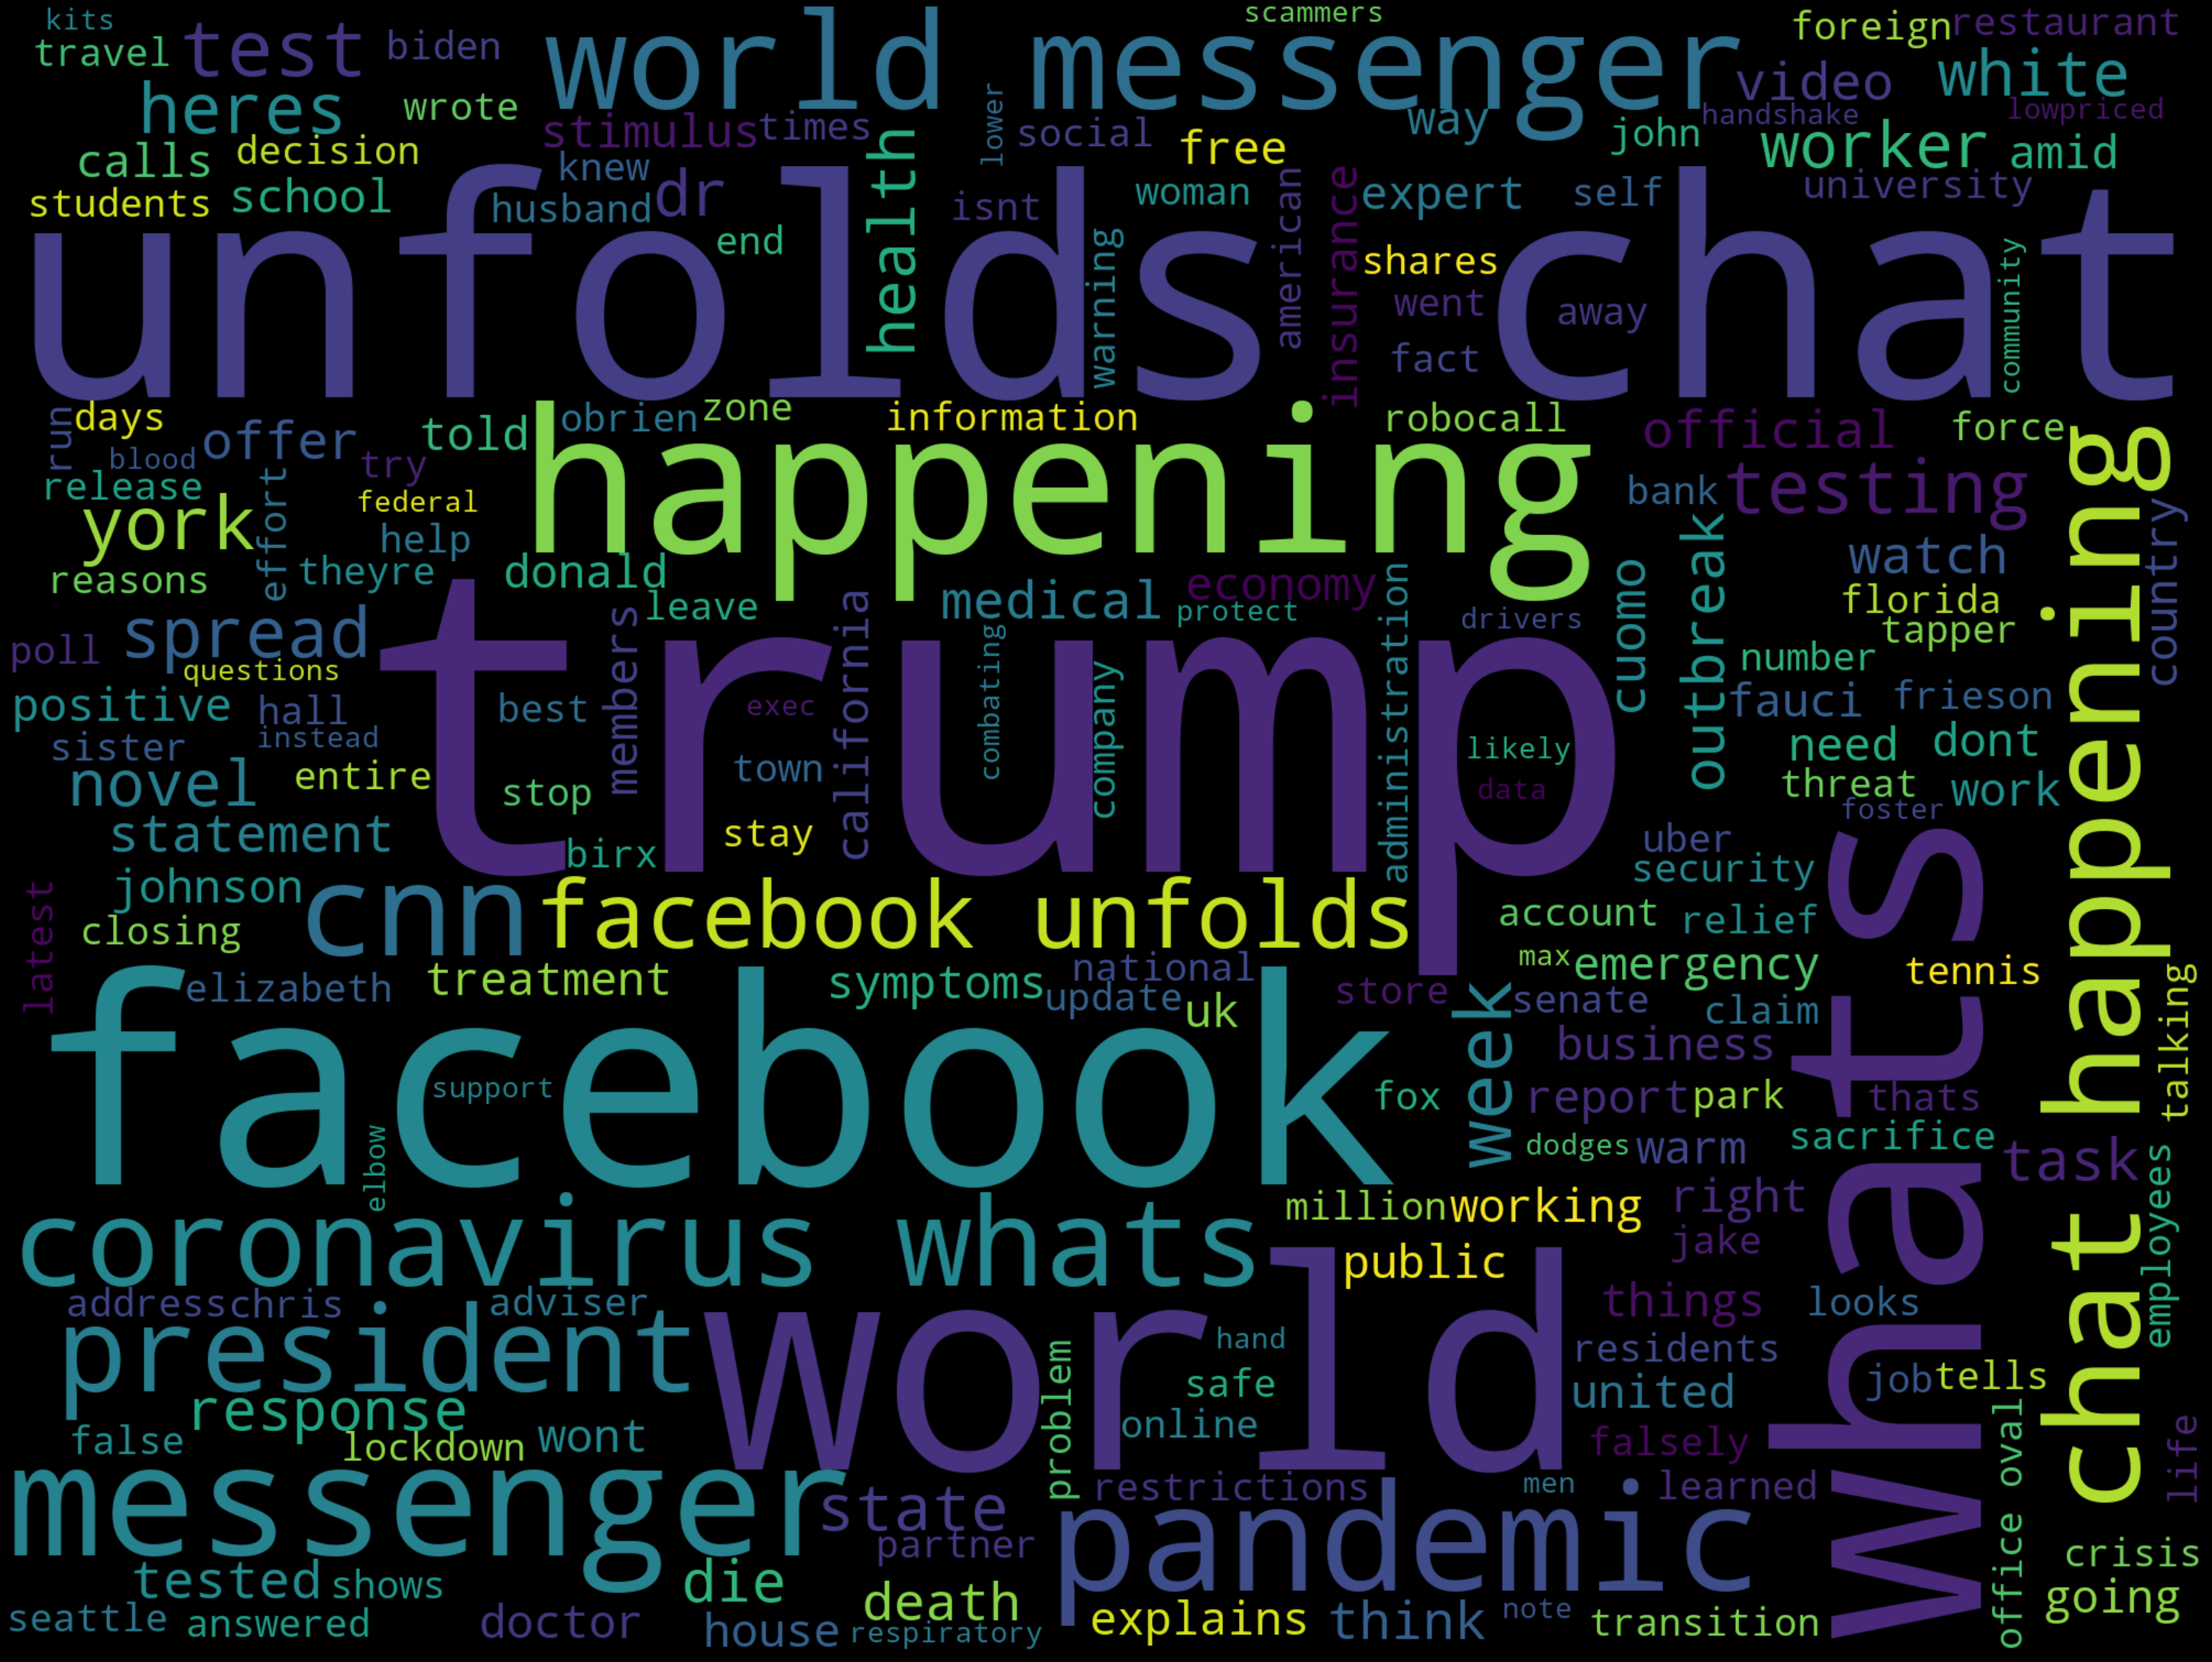

In [11]:
text = " ".join(flat_list)
wordcloud = WordCloud(
    width = 2000,
    height = 1500,
    background_color = 'black',
    stopwords = STOPWORDS).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
def textblob_sentiment(title,description):
    blob = TextBlob(str(title)+" "+str(description))
    return blob.sentiment.polarity

In [ ]:
create_mask():
    mask = np.array(Image.open("coronavirus.png"))
    im_gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(im_gray, thresh=20, maxval=255, type=cv2.THRESH_BINARY)
    mask = 255 - mask
    return maskmask = create_mask()def create_wc_by(source):
    data = fulldf[fulldf['source']==source]
    text = " ".join([x for x in data.content.values if x is not None])
    stopwords = set(STOPWORDS)
    stopwords.add('chars')
    stopwords.add('coronavirus')
    stopwords.add('corona')
    stopwords.add('covid-19')
    stopwords.add('chars')
    wc = WordCloud(background_color="white", max_words=1000, mask=mask, stopwords=stopwords,
               max_font_size=90, random_state=42, contour_width=3, contour_color='steelblue')
    wc.generate(text)
    plt.figure(figsize=[30,30])
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    return pltst.pyplot(create_wc_by(source),use_container_width=True)

In [ ]:
text_100=[]
for abc_articles in all_articles['articles']:
    art = Article(url=abc_articles['url'])
    art.download()
    art.parse()
    art.nlp()
    text_100.append(art.text)
    

In [ ]:
print(text_100)

In [ ]:
from nltk.corpus import webtext 
  
# use to find bigrams, which are pairs of words 
from nltk.collocations import BigramCollocationFinder 
from nltk.metrics import BigramAssocMeasures 


In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['Review Text'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review after removing stop words')
view raw
top_bigram_no_stopwords.py hosted with ❤ by GitHub 

In [ ]:
biagram_collocation = BigramCollocationFinder.from_words(text_100) 
biagram_collocation.nbest(BigramAssocMeasures.likelihood_ratio, 15) 



In [ ]:
import cv2def 

In [ ]:
create_mask():
    mask = np.array(Image.open("coronavirus.png"))
    im_gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(im_gray, thresh=20, maxval=255, type=cv2.THRESH_BINARY)
    mask = 255 - mask
    return maskmask = create_mask()def create_wc_by(source):
    data = fulldf[fulldf['source']==source]
    text = " ".join([x for x in data.content.values if x is not None])
    stopwords = set(STOPWORDS)
    stopwords.add('chars')
    stopwords.add('coronavirus')
    stopwords.add('corona')
    stopwords.add('chars')
    wc = WordCloud(background_color="white", max_words=1000, mask=mask, stopwords=stopwords,
               max_font_size=90, random_state=42, contour_width=3, contour_color='steelblue')
    wc.generate(text)
    plt.figure(figsize=[30,30])
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    return pltst.pyplot(create_wc_by(source),use_container_width=True)

In [ ]:
print (join(list(chain.from_iterable(filtered_sentence))))

In [ ]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
vect.set_params(tokenizer=tokenizer.tokenize(p2.text))

# remove English stop words
vect.set_params(stop_words='english')

# include 1-grams and 2-grams
vect.set_params(ngram_range=(1, 2))

# ignore terms that appear in more than 50% of the documents
vect.set_params(max_df=0.5)

# only keep terms that appear in at least 2 documents
vect.set_params(min_df=2)

In [ ]:
vect

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(text_100.text)

In [ ]:
from nltk import word_tokenize
tokens = word_tokenize(text_100.text)
print(tokens)

In [ ]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
print(stop_words)

In [ ]:
text_100_nltk = []
for word in tokens:
    if word not in stop_words:
        filtered_sentence.append(word)
print(tokens)
print("=================================================================================")
print(filtered_sentence)

In [ ]:
list(nltk.FreqDist(filtered_sentence).values())

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['Review Text'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df1.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review before removing stop words')
view raw
